# Notebook to do the data analysis.

Import Libraries

In [29]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from scipy.stats import chi2_contingency, pearsonr, spearmanr

In [30]:
import seaborn as sns
sns.set_theme(style="whitegrid")


Load dataset

In [31]:
# data load
df = sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


Saving the data

In [32]:
# save the df into csv
df.to_csv('../data/tips.csv', index=False)

# excel
df.to_excel('../data/tips.xlsx', index=False)

In [33]:
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [35]:
df.shape

(244, 7)

# Data Composition Report

In data composition we check:

1.The structure of the dataset (rows and columns)
2.The data types of each column
3.The presence of missing values
4.Basic statistics (mean, median, mode) for numerical columns
5.Distribution of categorical variables


In [36]:
# Check missing values
print("Missing Values:\n", df.isnull().sum(), "\n")

# Basic statistics for numerical columns
print("Basic Statistics for Numerical Columns:")
print(df.describe(), "\n")

# Distribution of categorical variables
print("Distribution of Categorical Variables:\n")
for col in df.select_dtypes(include=['object']).columns:
    print(f"\n{col.upper()} Distribution:")
    print(df[col].value_counts(normalize=True).round(3) * 100, "%")

Missing Values:
 total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64 

Basic Statistics for Numerical Columns:
       total_bill         tip        size
count  244.000000  244.000000  244.000000
mean    19.785943    2.998279    2.569672
std      8.902412    1.383638    0.951100
min      3.070000    1.000000    1.000000
25%     13.347500    2.000000    2.000000
50%     17.795000    2.900000    2.000000
75%     24.127500    3.562500    3.000000
max     50.810000   10.000000    6.000000 

Distribution of Categorical Variables:



# Data Distribution Report

Let's analyze the distribution of numerical variables using histograms and box plots to understand their shapes, central tendencies, and identify any outliers.

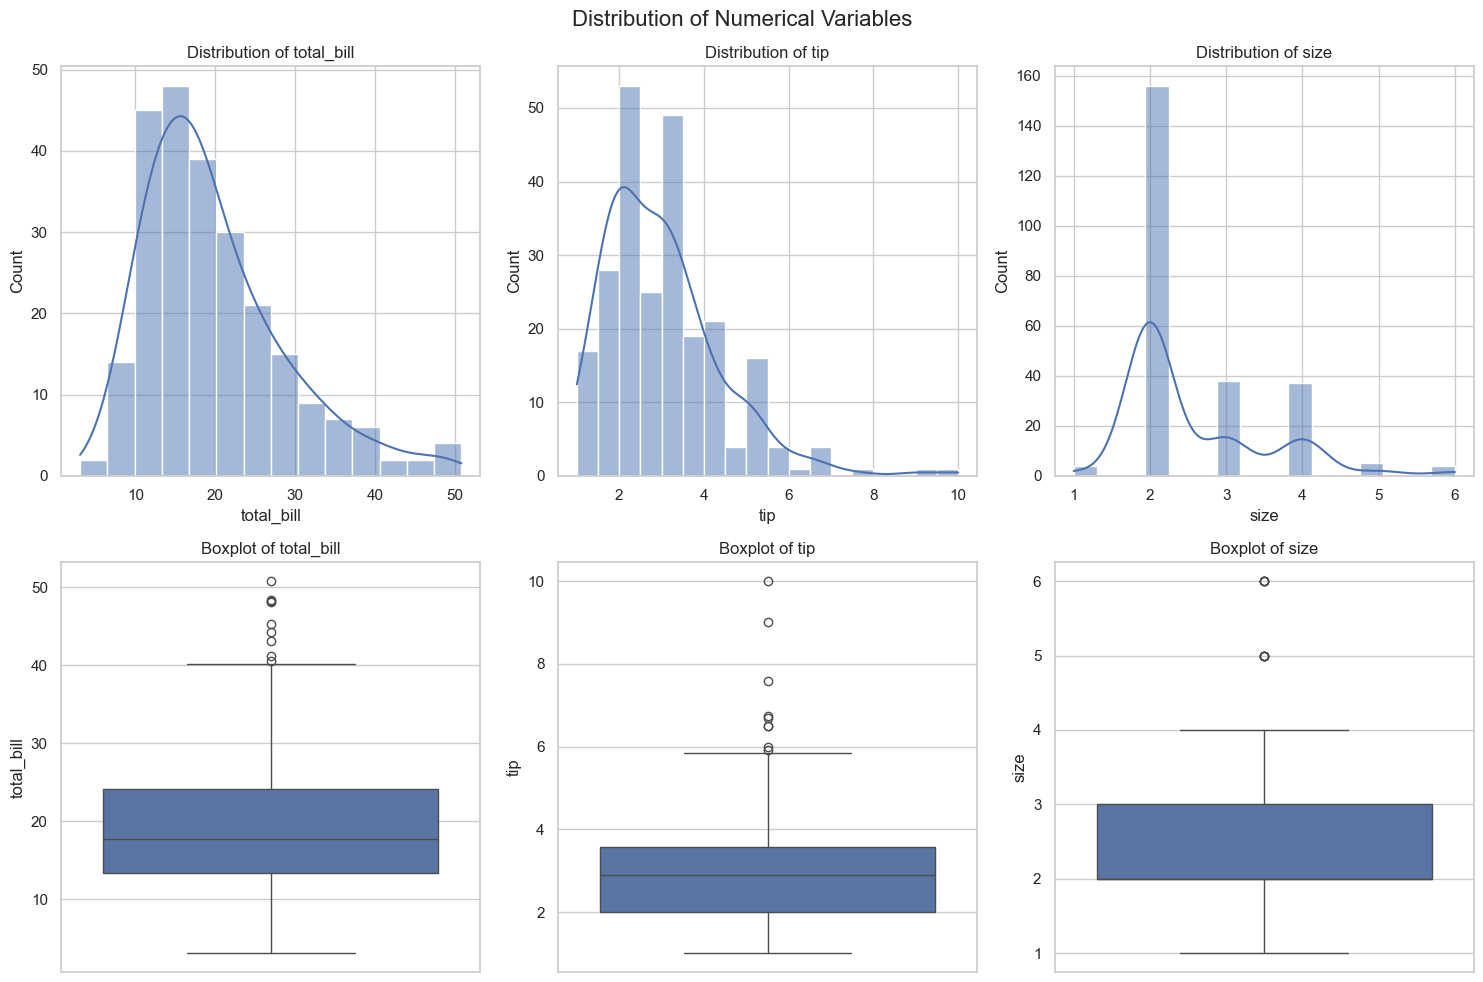


Summary for TOTAL_BILL:
Skewness: 1.133
Kurtosis: 1.218
Shapiro-Wilk test p-value: 0.0000
Not normally distributed

Summary for TIP:
Skewness: 1.465
Kurtosis: 3.648
Shapiro-Wilk test p-value: 0.0000
Not normally distributed

Summary for SIZE:
Skewness: 1.448
Kurtosis: 1.732
Shapiro-Wilk test p-value: 0.0000
Not normally distributed


In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# ✅ Use seaborn theme instead of matplotlib style
sns.set_theme(style="whitegrid")

# Create subplots for numerical variables
numerical_vars = ['total_bill', 'tip', 'size']
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Distribution of Numerical Variables', size=16)

# Flatten axes for easier iteration
axes = axes.flatten()

# Plot histograms and boxplots
for i, var in enumerate(numerical_vars):
    # Histogram
    sns.histplot(data=df, x=var, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {var}')
    
    # Boxplot
    sns.boxplot(data=df, y=var, ax=axes[i+3])
    axes[i+3].set_title(f'Boxplot of {var}')

plt.tight_layout()
plt.show()

# Print summary statistics and normality tests
for var in numerical_vars:
    print(f"\nSummary for {var.upper()}:")
    print("Skewness:", df[var].skew().round(3))
    print("Kurtosis:", df[var].kurtosis().round(3))
    # Shapiro-Wilk test for normality
    _, p_value = stats.shapiro(df[var])
    print(f"Shapiro-Wilk test p-value: {p_value:.4f}")
    print("Normal distribution:" if p_value > 0.05 else "Not normally distributed")


# Data Comparison Report

Let's analyze how different categorical variables affect the numerical variables in our dataset. We'll use various visualization techniques to understand these relationships.

In [ ]:
# Set the style
plt.style.use('seaborn')

# Create subplots for categorical comparisons
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Categorical Variable Comparisons', size=16)

# Box plots for tip by different categorical variables
sns.boxplot(data=df, x='day', y='tip', ax=axes[0,0])
axes[0,0].set_title('Tips by Day')
axes[0,0].set_xlabel('Day of Week')
axes[0,0].set_ylabel('Tip Amount ($)')

sns.boxplot(data=df, x='time', y='tip', ax=axes[0,1])
axes[0,1].set_title('Tips by Time')
axes[0,1].set_xlabel('Time of Day')
axes[0,1].set_ylabel('Tip Amount ($)')

# Bar plots for average tips
sns.barplot(data=df, x='day', y='tip', ci=None, ax=axes[1,0])
axes[1,0].set_title('Average Tips by Day')
axes[1,0].set_xlabel('Day of Week')
axes[1,0].set_ylabel('Average Tip ($)')

sns.barplot(data=df, x='time', y='tip', ci=None, ax=axes[1,1])
axes[1,1].set_title('Average Tips by Time')
axes[1,1].set_xlabel('Time of Day')
axes[1,1].set_ylabel('Average Tip ($)')

plt.tight_layout()
plt.show()

# Statistical tests
print("Statistical Tests for Categorical Variables:\n")

# Test for difference in tips between times of day
time_groups = df.groupby('time')['tip']
_, time_p_value = stats.f_oneway(*[group for name, group in time_groups])
print("Time of Day ANOVA p-value:", time_p_value.round(4))
print("Significant difference in tips between times:" if time_p_value < 0.05 else "No significant difference in tips between times")

# Test for difference in tips between days
day_groups = df.groupby('day')['tip']
_, day_p_value = stats.f_oneway(*[group for name, group in day_groups])
print("\nDay of Week ANOVA p-value:", day_p_value.round(4))
print("Significant difference in tips between days:" if day_p_value < 0.05 else "No significant difference in tips between days")

OSError: 'seaborn' is not a valid package style, path of style file, URL of style file, or library style name (library styles are listed in `style.available`)

# Data Relationship Report

Let's analyze the relationships between numerical variables and create correlation analysis.

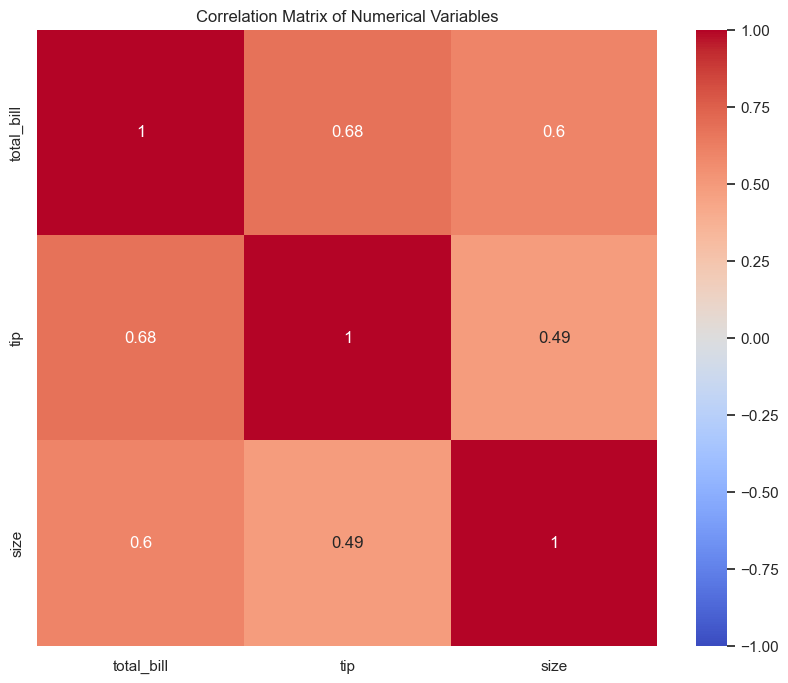

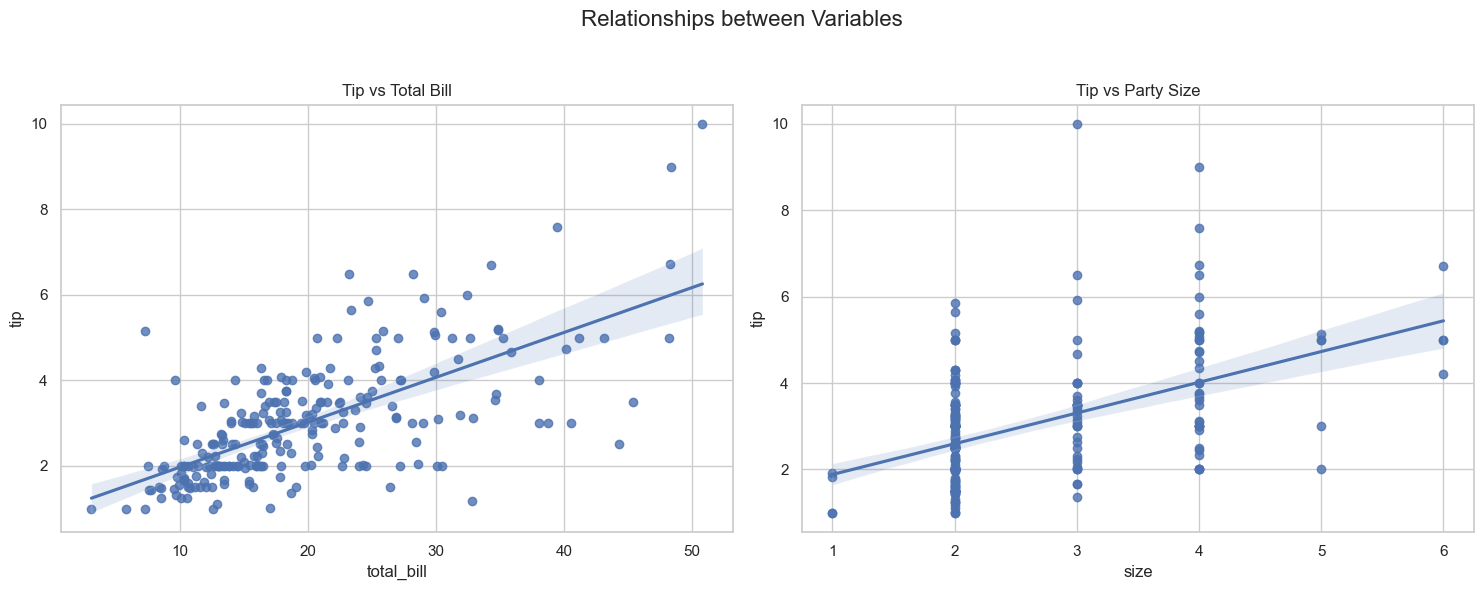

Correlation Statistics:

Total_Bill vs Tip:
Pearson correlation coefficient: 0.676
P-value: 0.0000
Significant correlation

Size vs Tip:
Pearson correlation coefficient: 0.489
P-value: 0.0000
Significant correlation

Total_Bill vs Tip:
Pearson correlation coefficient: 0.676
P-value: 0.0000
Significant correlation

Size vs Tip:
Pearson correlation coefficient: 0.489
P-value: 0.0000
Significant correlation



In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Ensure numerical variables
numerical_vars = ['total_bill', 'tip', 'size']
df[numerical_vars] = df[numerical_vars].apply(pd.to_numeric)

# Correlation matrix
correlation_matrix = df[numerical_vars].corr()

# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

# Scatter plots with regression lines
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
fig.suptitle('Relationships between Variables', size=16)

sns.regplot(data=df, x='total_bill', y='tip', ax=axes[0])
axes[0].set_title('Tip vs Total Bill')

sns.regplot(data=df, x='size', y='tip', ax=axes[1])
axes[1].set_title('Tip vs Party Size')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# Correlation statistics
print("Correlation Statistics:\n")
for var1, var2 in [('total_bill', 'tip'), ('size', 'tip')]:
    corr, p_value = pearsonr(df[var1], df[var2])
    print(f"{var1.title()} vs {var2.title()}:")
    print(f"Pearson correlation coefficient: {corr:.3f}")
    print(f"P-value: {p_value:.4f}")
    print("Significant correlation" if p_value < 0.05 else "No significant correlation")
    print()
